In [3]:
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']   = 11
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'''
\usepackage{physics}
\usepackage{siunitx}
'''

In [4]:
cosmos2020_cat=Table.read('COSMOS2020_photometric_only.fits', format='fits')

In [7]:
#mask - np.where(conditions>0)
#cosmo.write(mask,"") gets saved to new 
#now applying 4 masks
#select only inner imaged and not outer, within inner, <=3, lp_type=0
#np.loadtext(cfht_U,hsc_G,R,I,Z,Y.uvista_j,h,k_s)



In [9]:
mask1 = (
    (cosmos2020_cat['CFHT_u_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_g_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_r_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_i_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_z_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_y_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['UV'])
)

cosmos2020_cat[mask1].write("cosmo_reduced.fits", overwrite =True)

MemoryError: Unable to allocate 3.07 GiB for an array with shape (3293392192,) and data type uint8

In [7]:
bright_gal_cat = cosmos2020_cat[mask_bright]

In [8]:
wavelengths = [3823.29, 4816.12, 6234.11, 7740.58, 9125.20, 9779.93, 12534.65, 16453.41, 21539.88]

In [9]:
def get_column(name: str, col_id: int) -> float:
    return bright_gal_cat[name][bright_gal_cat["ID"] == col_id][0]


# float -> masked_array

def get_fluxes(col_id: int) -> list[float]:
    return np.ma.array([
        get_column('CFHT_u_FLUX_AUTO', col_id),
        get_column('HSC_g_FLUX_AUTO', col_id),
        get_column('HSC_r_FLUX_AUTO', col_id),
        get_column('HSC_i_FLUX_AUTO', col_id),
        get_column('HSC_z_FLUX_AUTO', col_id),
        get_column('HSC_y_FLUX_AUTO', col_id),
        get_column('UVISTA_J_FLUX_AUTO', col_id),
        get_column('UVISTA_H_FLUX_AUTO', col_id),
        get_column('UVISTA_Ks_FLUX_AUTO', col_id),
    ])
    

def get_errors(col_id: int) -> list[float]:
    return np.ma.array([
        get_column('CFHT_u_FLUXERR_AUTO', col_id),
        get_column('HSC_g_FLUXERR_AUTO', col_id),
        get_column('HSC_r_FLUXERR_AUTO', col_id),
        get_column('HSC_i_FLUXERR_AUTO', col_id),
        get_column('HSC_z_FLUXERR_AUTO', col_id),
        get_column('HSC_y_FLUXERR_AUTO', col_id),
        get_column('UVISTA_J_FLUXERR_AUTO', col_id),
        get_column('UVISTA_H_FLUXERR_AUTO', col_id),
        get_column('UVISTA_Ks_FLUXERR_AUTO', col_id),
    ])

In [10]:
random_ids = [1562161, 467547, 1371211, 66806, 989744]

fluxes = {
    random_id: get_fluxes(random_id) for random_id in random_ids
}

errors = {
    random_id: get_errors(random_id) for random_id in random_ids
}

# Normalize
for random_id in random_ids:
    scale_fac = 1.0 / np.nanmax(fluxes[random_id])
    fluxes[random_id] *= scale_fac
    errors[random_id] *= scale_fac

/home/danial/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


In [11]:
# read data of filters

DATA_DIR = 'filters/CFHT_u.txt'
CFHT_u_wavelength, CFHT_u_transmission = np.loadtxt(DATA_DIR,
                                         usecols=(0,1),
                                         dtype=np.dtype([('CFHT_u_wavelength', float),
                                                         ('CFHT_u_transmission', float)
                                                        ]),
                                         unpack=True)

DATA_DIR = 'filters/HSC_g.txt'
HSC_g_wavelength, HSC_g_transmission = np.loadtxt(DATA_DIR,
                                         usecols=(0,1),
                                         dtype=np.dtype([('HSC_g_wavelength', float),
                                                         ('HSC_g_transmission', float)
                                                        ]),
                                        unpack=True)

DATA_DIR = 'filters/HSC_r.txt'
HSC_r_wavelength, HSC_r_transmission = np.loadtxt(DATA_DIR,
                                         usecols=(0,1),
                                         dtype=np.dtype([('HSC_r_wavelength', float),
                                                         ('HSC_r_transmission', float)
                                                        ]),
                                        unpack=True)

DATA_DIR = 'filters/HSC_i.txt'
HSC_i_wavelength, HSC_i_transmission = np.loadtxt(DATA_DIR,
                                         usecols=(0,1),
                                         dtype=np.dtype([('HSC_i_wavelength', float),
                                                         ('HSC_i_transmission', float)
                                                        ]),
                                        unpack=True)

DATA_DIR = 'filters/HSC_y.txt'
HSC_y_wavelength, HSC_y_transmission = np.loadtxt(DATA_DIR,
                                         usecols=(0,1),
                                         dtype=np.dtype([('HSC_y_wavelength', float),
                                                         ('HSC_y_transmission', float)
                                                        ]),
                                        unpack=True)

DATA_DIR = 'filters/HSC_z.txt'
HSC_z_wavelength, HSC_z_transmission = np.loadtxt(DATA_DIR,
                                         usecols=(0,1),
                                         dtype=np.dtype([('HSC_z_wavelength', float),
                                                         ('HSC_z_transmission', float)
                                                        ]),
                                        unpack=True)

DATA_DIR = 'filters/UVISTA_H.txt'
UVISTA_H_wavelength, UVISTA_H_transmission = np.loadtxt(DATA_DIR,
                                             usecols=(0,1),
                                             dtype=np.dtype([('UVISTA_H_wavelength', float),
                                                             ('UVISTA_H_transmission', float)
                                                            ]),
                                             unpack=True)
DATA_DIR = 'filters/UVISTA_J.txt'
UVISTA_J_wavelength, UVISTA_J_transmission = np.loadtxt(DATA_DIR,
                                             usecols=(0,1),
                                             dtype=np.dtype([('UVISTA_J_wavelength', float),
                                                             ('UVISTA_J_transmission', float)
                                                            ]),
                                             unpack=True)

DATA_DIR = 'filters/UVISTA_Ks.txt'
UVISTA_Ks_wavelength, UVISTA_Ks_transmission = np.loadtxt(DATA_DIR,
                                               usecols=(0,1),
                                               dtype=np.dtype([('UVISTA_Ks_wavelength', float),
                                                              ('UVISTA_Ks_transmission', float)
                                                              ]),
                                               unpack=True)

FileNotFoundError: filters/CFHT_u.txt not found.

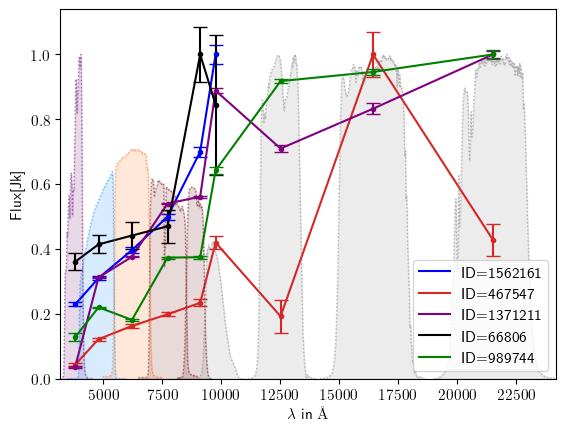

In [15]:
fig, ax = plt.subplots()

plot_colors = {
    1562161: "blue",
    467547: "tab:red",
    1371211: "purple",
    66806: "black",
    989744: "green",
}


for random_id in random_ids:
    plt.plot(wavelengths, fluxes[random_id], color=plot_colors[random_id], label=f"ID={random_id}")
    plt.errorbar(wavelengths, fluxes[random_id], yerr=errors[random_id], fmt=".", capsize=5, color=plot_colors[random_id]) 
    
# plot filters
plt.plot(CFHT_u_wavelength, CFHT_u_transmission, color='#6a006f', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(CFHT_u_wavelength, CFHT_u_transmission, color='#6a006f', alpha=0.15)
plt.plot(HSC_g_wavelength, HSC_g_transmission, color='#0084ff', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(HSC_g_wavelength, HSC_g_transmission, color='#0084ff', alpha=0.15)
plt.plot(HSC_r_wavelength, HSC_r_transmission, color='#ff6700', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(HSC_r_wavelength, HSC_r_transmission, color='#ff6700', alpha=0.15)
plt.plot(HSC_i_wavelength, HSC_i_transmission, color='#6f0000', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(HSC_i_wavelength, HSC_i_transmission, color='#6f0000', alpha=0.15)
plt.plot(HSC_y_wavelength, HSC_y_transmission, color='#610000', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(HSC_y_wavelength, HSC_y_transmission, color='#610000', alpha=0.15)
plt.plot(HSC_z_wavelength, HSC_z_transmission, color='gray', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(HSC_z_wavelength, HSC_z_transmission, color='gray', alpha=0.15)
plt.plot(UVISTA_H_wavelength, UVISTA_H_transmission, color='gray', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(UVISTA_H_wavelength, UVISTA_H_transmission, color='gray', alpha=0.15)
plt.plot(UVISTA_J_wavelength, UVISTA_J_transmission, color='gray', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(UVISTA_J_wavelength, UVISTA_J_transmission, color='gray', alpha=0.15)
plt.plot(UVISTA_Ks_wavelength, UVISTA_Ks_transmission, color='gray', alpha=0.5, linewidth=1.0, linestyle='dotted')
ax.fill_between(UVISTA_Ks_wavelength, UVISTA_Ks_transmission, color='gray', alpha=0.15)

plt.ylabel('Flux[Jk]')
plt.xlabel(r'$\lambda$ in $\SI{}{\angstrom}$')
plt.xlim(min(CFHT_u_wavelength), max(UVISTA_Ks_wavelength))
plt.ylim(0.0)
plt.legend(loc='lower right')
plt.show()

# fig.savefig('wavelength-vs-flux.eps', format='eps', bbox_inches='tight')
# fig.savefig('wavelength-vs-flux.pdf', format='pdf', bbox_inches='tight')
fig.savefig('wavelength-vs-flux.png', format='png', bbox_inches='tight', dpi=300)
# fig.savefig('wavelength-vs-flux.svg', format='svg', bbox_inches='tight')

In [38]:
good_est= (bright_gal_cat['lp_chi2_best']>9)

In [39]:
bright_gal_cat[good_est]

ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,FLAG_HSC,FLAG_SUPCAM,FLAG_UVISTA,FLAG_UDEEP,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX_APER2,CFHT_u_FLUXERR_APER2,CFHT_u_FLUX_APER3,CFHT_u_FLUXERR_APER3,CFHT_u_FLUX_AUTO,CFHT_u_FLUXERR_AUTO,CFHT_u_MAG_APER2,CFHT_u_MAGERR_APER2,CFHT_u_MAG_APER3,CFHT_u_MAGERR_APER3,CFHT_u_MAG_AUTO,CFHT_u_MAGERR_AUTO,CFHT_u_MAG_ISO,CFHT_u_MAGERR_ISO,CFHT_u_FLAGS,CFHT_u_IMAFLAGS_ISO,CFHT_ustar_FLUX_APER2,CFHT_ustar_FLUXERR_APER2,CFHT_ustar_FLUX_APER3,CFHT_ustar_FLUXERR_APER3,CFHT_ustar_FLUX_AUTO,CFHT_ustar_FLUXERR_AUTO,CFHT_ustar_MAG_APER2,CFHT_ustar_MAGERR_APER2,CFHT_ustar_MAG_APER3,CFHT_ustar_MAGERR_APER3,CFHT_ustar_MAG_AUTO,CFHT_ustar_MAGERR_AUTO,CFHT_ustar_MAG_ISO,CFHT_ustar_MAGERR_ISO,CFHT_ustar_FLAGS,CFHT_ustar_IMAFLAGS_ISO,HSC_g_FLUX_APER2,HSC_g_FLUXERR_APER2,HSC_g_FLUX_APER3,HSC_g_FLUXERR_APER3,HSC_g_FLUX_AUTO,HSC_g_FLUXERR_AUTO,HSC_g_MAG_APER2,HSC_g_MAGERR_APER2,HSC_g_MAG_APER3,HSC_g_MAGERR_APER3,HSC_g_MAG_AUTO,HSC_g_MAGERR_AUTO,HSC_g_MAG_ISO,HSC_g_MAGERR_ISO,HSC_g_FLAGS,HSC_g_IMAFLAGS_ISO,HSC_r_FLUX_APER2,HSC_r_FLUXERR_APER2,HSC_r_FLUX_APER3,HSC_r_FLUXERR_APER3,HSC_r_FLUX_AUTO,HSC_r_FLUXERR_AUTO,HSC_r_MAG_APER2,HSC_r_MAGERR_APER2,HSC_r_MAG_APER3,HSC_r_MAGERR_APER3,HSC_r_MAG_AUTO,HSC_r_MAGERR_AUTO,HSC_r_MAG_ISO,HSC_r_MAGERR_ISO,HSC_r_FLAGS,HSC_r_IMAFLAGS_ISO,HSC_i_FLUX_APER2,HSC_i_FLUXERR_APER2,HSC_i_FLUX_APER3,HSC_i_FLUXERR_APER3,HSC_i_FLUX_AUTO,HSC_i_FLUXERR_AUTO,HSC_i_MAG_APER2,HSC_i_MAGERR_APER2,HSC_i_MAG_APER3,HSC_i_MAGERR_APER3,HSC_i_MAG_AUTO,HSC_i_MAGERR_AUTO,HSC_i_MAG_ISO,HSC_i_MAGERR_ISO,HSC_i_FLAGS,HSC_i_IMAFLAGS_ISO,HSC_z_FLUX_APER2,HSC_z_FLUXERR_APER2,HSC_z_FLUX_APER3,HSC_z_FLUXERR_APER3,HSC_z_FLUX_AUTO,HSC_z_FLUXERR_AUTO,HSC_z_MAG_APER2,HSC_z_MAGERR_APER2,HSC_z_MAG_APER3,HSC_z_MAGERR_APER3,HSC_z_MAG_AUTO,HSC_z_MAGERR_AUTO,HSC_z_MAG_ISO,HSC_z_MAGERR_ISO,HSC_z_FLAGS,HSC_z_IMAFLAGS_ISO,HSC_y_FLUX_APER2,HSC_y_FLUXERR_APER2,HSC_y_FLUX_APER3,HSC_y_FLUXERR_APER3,HSC_y_FLUX_AUTO,HSC_y_FLUXERR_AUTO,HSC_y_MAG_APER2,HSC_y_MAGERR_APER2,HSC_y_MAG_APER3,HSC_y_MAGERR_APER3,HSC_y_MAG_AUTO,HSC_y_MAGERR_AUTO,HSC_y_MAG_ISO,HSC_y_MAGERR_ISO,HSC_y_FLAGS,HSC_y_IMAFLAGS_ISO,UVISTA_Y_FLUX_APER2,UVISTA_Y_FLUXERR_APER2,UVISTA_Y_FLUX_APER3,UVISTA_Y_FLUXERR_APER3,UVISTA_Y_FLUX_AUTO,UVISTA_Y_FLUXERR_AUTO,UVISTA_Y_MAG_APER2,UVISTA_Y_MAGERR_APER2,UVISTA_Y_MAG_APER3,UVISTA_Y_MAGERR_APER3,UVISTA_Y_MAG_AUTO,UVISTA_Y_MAGERR_AUTO,UVISTA_Y_MAG_ISO,UVISTA_Y_MAGERR_ISO,UVISTA_Y_FLAGS,UVISTA_Y_IMAFLAGS_ISO,UVISTA_J_FLUX_APER2,UVISTA_J_FLUXERR_APER2,UVISTA_J_FLUX_APER3,UVISTA_J_FLUXERR_APER3,UVISTA_J_FLUX_AUTO,UVISTA_J_FLUXERR_AUTO,UVISTA_J_MAG_APER2,UVISTA_J_MAGERR_APER2,UVISTA_J_MAG_APER3,UVISTA_J_MAGERR_APER3,UVISTA_J_MAG_AUTO,UVISTA_J_MAGERR_AUTO,UVISTA_J_MAG_ISO,UVISTA_J_MAGERR_ISO,UVISTA_J_FLAGS,UVISTA_J_IMAFLAGS_ISO,UVISTA_H_FLUX_APER2,UVISTA_H_FLUXERR_APER2,UVISTA_H_FLUX_APER3,UVISTA_H_FLUXERR_APER3,UVISTA_H_FLUX_AUTO,UVISTA_H_FLUXERR_AUTO,UVISTA_H_MAG_APER2,UVISTA_H_MAGERR_APER2,UVISTA_H_MAG_APER3,UVISTA_H_MAGERR_APER3,UVISTA_H_MAG_AUTO,UVISTA_H_MAGERR_AUTO,UVISTA_H_MAG_ISO,UVISTA_H_MAGERR_ISO,UVISTA_H_FLAGS,UVISTA_H_IMAFLAGS_ISO,UVISTA_Ks_FLUX_APER2,UVISTA_Ks_FLUXERR_APER2,UVISTA_Ks_FLUX_APER3,UVISTA_Ks_FLUXERR_APER3,UVISTA_Ks_FLUX_AUTO,UVISTA_Ks_FLUXERR_AUTO,UVISTA_Ks_MAG_APER2,UVISTA_Ks_MAGERR_APER2,UVISTA_Ks_MAG_APER3,UVISTA_Ks_MAGERR_APER3,UVISTA_Ks_MAG_AUTO,UVISTA_Ks_MAGERR_AUTO,UVISTA_Ks_MAG_ISO,UVISTA_Ks_MAGERR_ISO,UVISTA_Ks_FLAGS,UVISTA_Ks_IMAFLAGS_ISO,SC_IB427_FLUX_APER2,SC_IB427_FLUXERR_APER2,SC_IB427_FLUX_APER3,SC_IB427_FLUXERR_APER3,SC_IB427_FLUX_AUTO,SC_IB427_FLUXERR_AUTO,SC_IB427_MAG_APER2,SC_IB427_MAGERR_APER2,SC_IB427_MAG_APER3,SC_IB427_MAGERR_APER3,SC_IB427_MAG_AUTO,SC_IB427_MAGERR_AUTO,SC_IB427_MAG_ISO,SC_IB427_MAGERR_ISO,SC_IB427_FLAGS,SC_IB427_IMAFLAGS_ISO,SC_IB464_FLUX_APER2,SC_IB464_FLUXERR_APER2,SC_IB464_FLUX_APER3,SC_IB464_FLUXERR_APER3,SC_IB464_FLUX_AUTO,SC_IB464_FLUXERR_AUTO,SC_IB464_MAG_APER2,SC_IB464_MAGERR_APER2,SC_IB464_MAG_APER3,SC_IB

In [40]:
#select galaxies with i_mag<=24.5 and FLAG_COMBINED=1 form cosmos catalog:
#mask_quality = (cosmos2020_cat['FLAG_COMBINED']==1)&(cosmos2020_cat['HSC_i_MAG_AUTO']<=24.5)

In [41]:
#select i<=24.5 objects from bright_gal_cat:
mask_quality_bright = (bright_gal_cat['HSC_i_MAG_AUTO']<=22.5)

In [42]:
quality_cat = bright_gal_cat[mask_quality_bright]

In [43]:
quality_cat

ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,FLAG_HSC,FLAG_SUPCAM,FLAG_UVISTA,FLAG_UDEEP,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX_APER2,CFHT_u_FLUXERR_APER2,CFHT_u_FLUX_APER3,CFHT_u_FLUXERR_APER3,CFHT_u_FLUX_AUTO,CFHT_u_FLUXERR_AUTO,CFHT_u_MAG_APER2,CFHT_u_MAGERR_APER2,CFHT_u_MAG_APER3,CFHT_u_MAGERR_APER3,CFHT_u_MAG_AUTO,CFHT_u_MAGERR_AUTO,CFHT_u_MAG_ISO,CFHT_u_MAGERR_ISO,CFHT_u_FLAGS,CFHT_u_IMAFLAGS_ISO,CFHT_ustar_FLUX_APER2,CFHT_ustar_FLUXERR_APER2,CFHT_ustar_FLUX_APER3,CFHT_ustar_FLUXERR_APER3,CFHT_ustar_FLUX_AUTO,CFHT_ustar_FLUXERR_AUTO,CFHT_ustar_MAG_APER2,CFHT_ustar_MAGERR_APER2,CFHT_ustar_MAG_APER3,CFHT_ustar_MAGERR_APER3,CFHT_ustar_MAG_AUTO,CFHT_ustar_MAGERR_AUTO,CFHT_ustar_MAG_ISO,CFHT_ustar_MAGERR_ISO,CFHT_ustar_FLAGS,CFHT_ustar_IMAFLAGS_ISO,HSC_g_FLUX_APER2,HSC_g_FLUXERR_APER2,HSC_g_FLUX_APER3,HSC_g_FLUXERR_APER3,HSC_g_FLUX_AUTO,HSC_g_FLUXERR_AUTO,HSC_g_MAG_APER2,HSC_g_MAGERR_APER2,HSC_g_MAG_APER3,HSC_g_MAGERR_APER3,HSC_g_MAG_AUTO,HSC_g_MAGERR_AUTO,HSC_g_MAG_ISO,HSC_g_MAGERR_ISO,HSC_g_FLAGS,HSC_g_IMAFLAGS_ISO,HSC_r_FLUX_APER2,HSC_r_FLUXERR_APER2,HSC_r_FLUX_APER3,HSC_r_FLUXERR_APER3,HSC_r_FLUX_AUTO,HSC_r_FLUXERR_AUTO,HSC_r_MAG_APER2,HSC_r_MAGERR_APER2,HSC_r_MAG_APER3,HSC_r_MAGERR_APER3,HSC_r_MAG_AUTO,HSC_r_MAGERR_AUTO,HSC_r_MAG_ISO,HSC_r_MAGERR_ISO,HSC_r_FLAGS,HSC_r_IMAFLAGS_ISO,HSC_i_FLUX_APER2,HSC_i_FLUXERR_APER2,HSC_i_FLUX_APER3,HSC_i_FLUXERR_APER3,HSC_i_FLUX_AUTO,HSC_i_FLUXERR_AUTO,HSC_i_MAG_APER2,HSC_i_MAGERR_APER2,HSC_i_MAG_APER3,HSC_i_MAGERR_APER3,HSC_i_MAG_AUTO,HSC_i_MAGERR_AUTO,HSC_i_MAG_ISO,HSC_i_MAGERR_ISO,HSC_i_FLAGS,HSC_i_IMAFLAGS_ISO,HSC_z_FLUX_APER2,HSC_z_FLUXERR_APER2,HSC_z_FLUX_APER3,HSC_z_FLUXERR_APER3,HSC_z_FLUX_AUTO,HSC_z_FLUXERR_AUTO,HSC_z_MAG_APER2,HSC_z_MAGERR_APER2,HSC_z_MAG_APER3,HSC_z_MAGERR_APER3,HSC_z_MAG_AUTO,HSC_z_MAGERR_AUTO,HSC_z_MAG_ISO,HSC_z_MAGERR_ISO,HSC_z_FLAGS,HSC_z_IMAFLAGS_ISO,HSC_y_FLUX_APER2,HSC_y_FLUXERR_APER2,HSC_y_FLUX_APER3,HSC_y_FLUXERR_APER3,HSC_y_FLUX_AUTO,HSC_y_FLUXERR_AUTO,HSC_y_MAG_APER2,HSC_y_MAGERR_APER2,HSC_y_MAG_APER3,HSC_y_MAGERR_APER3,HSC_y_MAG_AUTO,HSC_y_MAGERR_AUTO,HSC_y_MAG_ISO,HSC_y_MAGERR_ISO,HSC_y_FLAGS,HSC_y_IMAFLAGS_ISO,UVISTA_Y_FLUX_APER2,UVISTA_Y_FLUXERR_APER2,UVISTA_Y_FLUX_APER3,UVISTA_Y_FLUXERR_APER3,UVISTA_Y_FLUX_AUTO,UVISTA_Y_FLUXERR_AUTO,UVISTA_Y_MAG_APER2,UVISTA_Y_MAGERR_APER2,UVISTA_Y_MAG_APER3,UVISTA_Y_MAGERR_APER3,UVISTA_Y_MAG_AUTO,UVISTA_Y_MAGERR_AUTO,UVISTA_Y_MAG_ISO,UVISTA_Y_MAGERR_ISO,UVISTA_Y_FLAGS,UVISTA_Y_IMAFLAGS_ISO,UVISTA_J_FLUX_APER2,UVISTA_J_FLUXERR_APER2,UVISTA_J_FLUX_APER3,UVISTA_J_FLUXERR_APER3,UVISTA_J_FLUX_AUTO,UVISTA_J_FLUXERR_AUTO,UVISTA_J_MAG_APER2,UVISTA_J_MAGERR_APER2,UVISTA_J_MAG_APER3,UVISTA_J_MAGERR_APER3,UVISTA_J_MAG_AUTO,UVISTA_J_MAGERR_AUTO,UVISTA_J_MAG_ISO,UVISTA_J_MAGERR_ISO,UVISTA_J_FLAGS,UVISTA_J_IMAFLAGS_ISO,UVISTA_H_FLUX_APER2,UVISTA_H_FLUXERR_APER2,UVISTA_H_FLUX_APER3,UVISTA_H_FLUXERR_APER3,UVISTA_H_FLUX_AUTO,UVISTA_H_FLUXERR_AUTO,UVISTA_H_MAG_APER2,UVISTA_H_MAGERR_APER2,UVISTA_H_MAG_APER3,UVISTA_H_MAGERR_APER3,UVISTA_H_MAG_AUTO,UVISTA_H_MAGERR_AUTO,UVISTA_H_MAG_ISO,UVISTA_H_MAGERR_ISO,UVISTA_H_FLAGS,UVISTA_H_IMAFLAGS_ISO,UVISTA_Ks_FLUX_APER2,UVISTA_Ks_FLUXERR_APER2,UVISTA_Ks_FLUX_APER3,UVISTA_Ks_FLUXERR_APER3,UVISTA_Ks_FLUX_AUTO,UVISTA_Ks_FLUXERR_AUTO,UVISTA_Ks_MAG_APER2,UVISTA_Ks_MAGERR_APER2,UVISTA_Ks_MAG_APER3,UVISTA_Ks_MAGERR_APER3,UVISTA_Ks_MAG_AUTO,UVISTA_Ks_MAGERR_AUTO,UVISTA_Ks_MAG_ISO,UVISTA_Ks_MAGERR_ISO,UVISTA_Ks_FLAGS,UVISTA_Ks_IMAFLAGS_ISO,SC_IB427_FLUX_APER2,SC_IB427_FLUXERR_APER2,SC_IB427_FLUX_APER3,SC_IB427_FLUXERR_APER3,SC_IB427_FLUX_AUTO,SC_IB427_FLUXERR_AUTO,SC_IB427_MAG_APER2,SC_IB427_MAGERR_APER2,SC_IB427_MAG_APER3,SC_IB427_MAGERR_APER3,SC_IB427_MAG_AUTO,SC_IB427_MAGERR_AUTO,SC_IB427_MAG_ISO,SC_IB427_MAGERR_ISO,SC_IB427_FLAGS,SC_IB427_IMAFLAGS_ISO,SC_IB464_FLUX_APER2,SC_IB464_FLUXERR_APER2,SC_IB464_FLUX_APER3,SC_IB464_FLUXERR_APER3,SC_IB464_FLUX_AUTO,SC_IB464_FLUXERR_AUTO,SC_IB464_MAG_APER2,SC_IB464_MAGERR_APER2,SC_IB464_MAG_APER3,SC_IB

ValueError: autodetected range of [nan, nan] is not finite

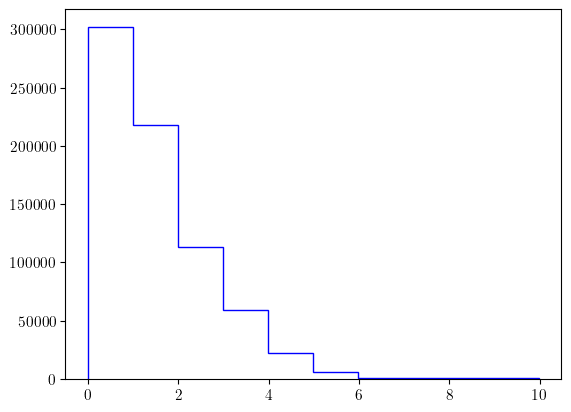

In [44]:
plt.hist(cosmos2020_cat['lp_zBEST'], histtype='step', color='blue', label='COSMOS2020_cat')
plt.hist(quality_cat['lp_zBEST'], histtype='step', color='tab:red', label='Quality_cat')

In [ ]:
import numpy as np
if np.any(np.isnan(quality_cat)):
    print("Daten enthalten NaN-Werte!")